[Diffusion] Epoch 1/30, Batch 0, Loss: 0.9966
[Diffusion] Epoch 1/30, Batch 100, Loss: 0.9749
[Diffusion] Epoch 1/30, Batch 200, Loss: 0.9322
[Diffusion] Epoch 1/30, Batch 300, Loss: 0.9098
[Diffusion] Epoch 1/30, Batch 400, Loss: 0.8961
[Diffusion] Epoch 1/30, Batch 500, Loss: 0.8936
[Diffusion] Epoch 1/30, Batch 600, Loss: 0.8898
[Diffusion] Epoch 1/30, Batch 700, Loss: 0.8584
[Diffusion] Epoch 1/30 - Avg loss: 0.9108
[Diffusion] Epoch 2/30, Batch 0, Loss: 0.8691
[Diffusion] Epoch 2/30, Batch 100, Loss: 0.8599
[Diffusion] Epoch 2/30, Batch 200, Loss: 0.8460
[Diffusion] Epoch 2/30, Batch 300, Loss: 0.8441
[Diffusion] Epoch 2/30, Batch 400, Loss: 0.8267
[Diffusion] Epoch 2/30, Batch 500, Loss: 0.8169
[Diffusion] Epoch 2/30, Batch 600, Loss: 0.7952
[Diffusion] Epoch 2/30, Batch 700, Loss: 0.7930
[Diffusion] Epoch 2/30 - Avg loss: 0.8272
[Diffusion] Epoch 3/30, Batch 0, Loss: 0.7864
[Diffusion] Epoch 3/30, Batch 100, Loss: 0.7527
[Diffusion] Epoch 3/30, Batch 200, Loss: 0.7450
[Diffusion

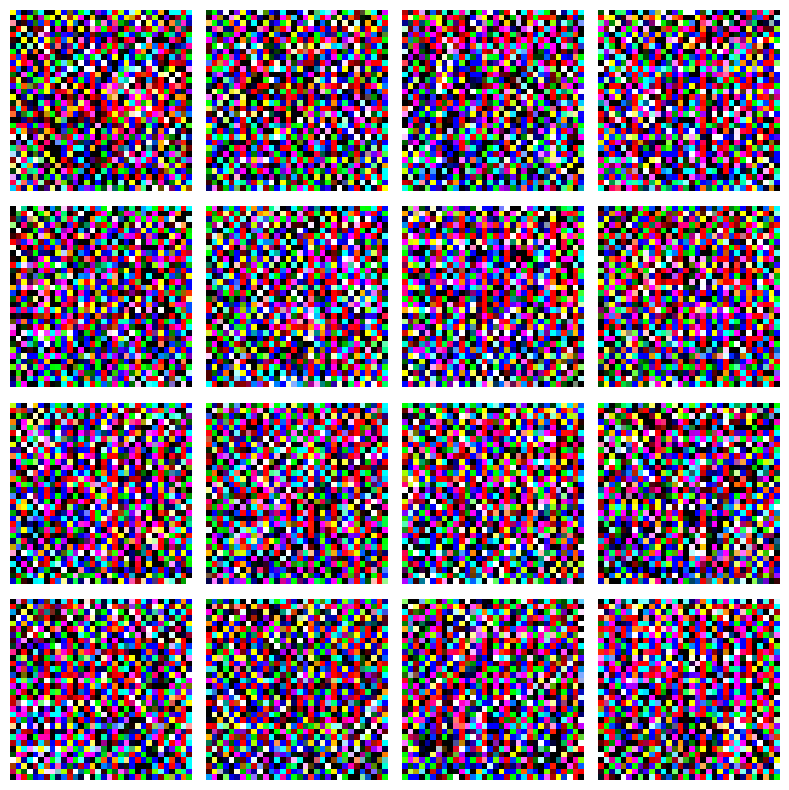

In [2]:
from helper_lib import get_model, get_data_loader, train_diffusion, generate_diffusion_samples, save_model
import torch
import torch.nn as nn
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_loader = get_data_loader(
    './data',
    batch_size=64,
    dataset_type='cifar10',
    train=True,
    for_vae=True,
)

model = get_model('Diffusion', input_channels=3)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

model = train_diffusion(
    model, train_loader, criterion, optimizer,
    device=device, epochs=30
)

save_model(model, path="diffusion_mnist.pth")

generate_diffusion_samples(
    model,
    device=device,
    num_samples=16,
    diffusion_steps=100
)

[EBM] Epoch 1/1, Batch 0, Loss: -0.0006, E_pos: 0.032, E_neg: 0.033
[EBM] Epoch 1/1, Batch 100, Loss: -124.7715, E_pos: 270.275, E_neg: 395.047
[EBM] Epoch 1/1, Batch 200, Loss: -193.1121, E_pos: 599.126, E_neg: 792.238
[EBM] Epoch 1/1, Batch 300, Loss: -362.9691, E_pos: 1703.879, E_neg: 2066.848
[EBM] Epoch 1/1, Batch 400, Loss: -1985.2291, E_pos: 932.159, E_neg: 2917.388
[EBM] Epoch 1/1, Batch 500, Loss: -549166.7500, E_pos: -122665.344, E_neg: 426501.406
[EBM] Epoch 1/1, Batch 600, Loss: -10843452.0000, E_pos: -1862670.250, E_neg: 8980782.000
[EBM] Epoch 1/1, Batch 700, Loss: -11478655.0000, E_pos: 85400.297, E_neg: 11564055.000
[EBM] Epoch 1/1 - Avg loss: -3463754.5830


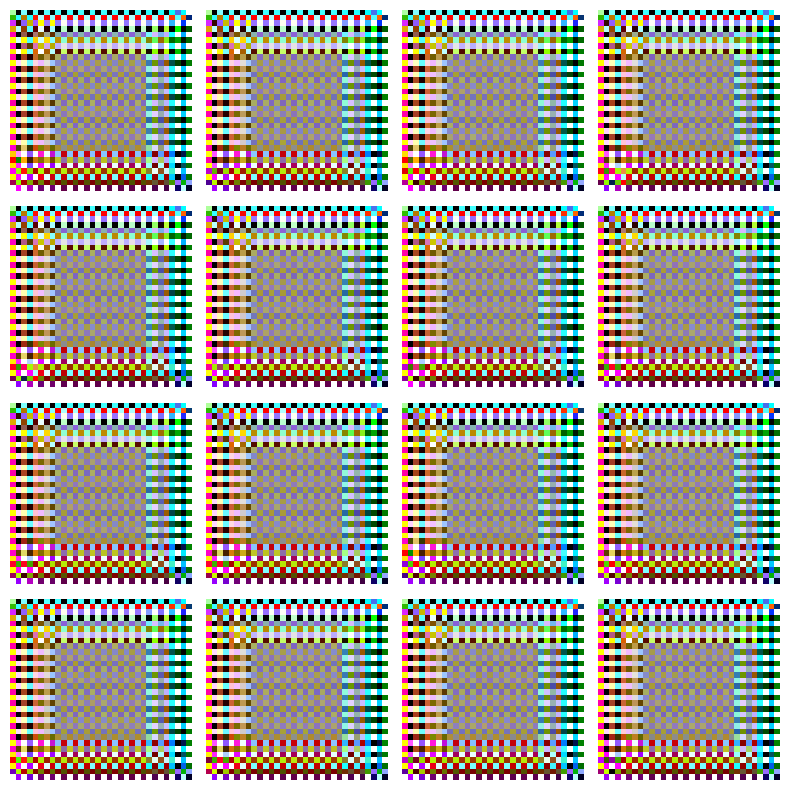

In [ ]:
from helper_lib import (
    get_model, get_data_loader,
    train_ebm, generate_ebm_samples
)
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_loader = get_data_loader(
    './data',
    batch_size=64,
    dataset_type='cifar10',
    train=True,
    for_vae=True   # images in [0,1]
)

model = get_model('EBM', input_channels=3)

# train just 1 epoch to test the pipeline
model = train_ebm(
    model, train_loader,
    device=device,
    epochs=1,
    lr=1e-4,
    steps_langevin=20,
    step_size=1e-2,
    noise_std=1e-2
)

generate_ebm_samples(
    model,
    device=device,
    num_samples=16,
    steps=40,
    step_size=1e-2,
    noise_std=1e-2
)

In [2]:
from helper_lib import save_model
import os

os.makedirs("models", exist_ok=True)
save_model(model, path="models/ebm_cifar10.pth")

Model saved to models/ebm_cifar10.pth
